**IMPORTING PYTHON LIBRARIES**

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**READING DATASET**

In [110]:
dataset=pd.read_csv('https://s3-eu-west-1.amazonaws.com/valohai-examples/load-forecasting/ercot-dataset.csv')
dataset['Year'] = dataset['Year'].replace({2006: 2019})
dataset['Year'] = dataset['Year'].replace({2007: 2020})
dataset['Year'] = dataset['Year'].replace({2008: 2021})
dataset['Year'] = dataset['Year'].replace({2009: 2022})
dataset['Year'] = dataset['Year'].replace({2010: 2023})
X=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,-1].values

**SPLITTING DATASET**

In [111]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.25,random_state=0)

**FEATURE SCALING**

In [112]:
y_train=y_train.reshape((len(y_train)),1)
from sklearn.preprocessing import StandardScaler
scaler1=StandardScaler()
scaler2=StandardScaler()
X_train=scaler1.fit_transform(X_train)
X_test=scaler1.fit_transform(X_test)
y_train=scaler2.fit_transform(y_train)

**SUPPORT VECTOR REGRESSION**

In [113]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')
regressor.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

**PREDICT VALUE**

In [114]:
#classifier.predict(scaler.transform([[6,5,4,1,2,10,3,7,3]]))
scaler2.inverse_transform(regressor.predict(scaler1.transform([[23.9,21.65,22.4,87.5,19.67,6,3,2024,30]])).reshape(-1, 1))

array([[7647.30153217]])

**PREDICT TEST VALUE**

In [115]:
y_pred=scaler2.inverse_transform(regressor.predict(X_test).reshape(-1,1))
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[ 8201.34432021  8318.64      ]
 [10186.42707614  9250.62667   ]
 [ 8119.75676208  8168.76      ]
 ...
 [ 7267.82020836  6603.83      ]
 [ 8215.86786077  7675.47      ]
 [ 9460.97948789  9120.86      ]]


**R2_SCORE**

In [116]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.8107976586322163


**VISUAL COMPARISON**

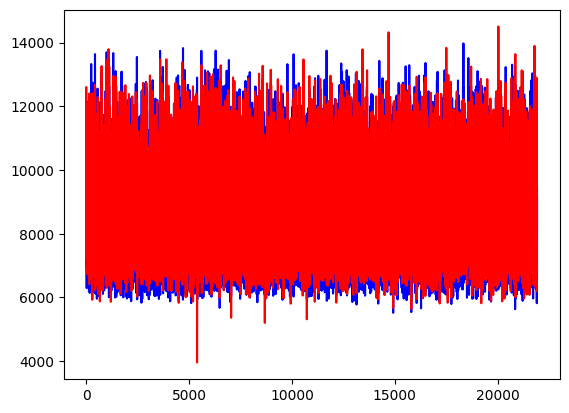

In [117]:
plt.plot([i+1 for i in range(len(y_test))],y_test,color='blue')
plt.plot([i+1 for i in range(len(y_pred))],y_pred,color='red')
plt.show()